# 1.2 Data Wranling - Limpieza de outliers

Analizaremos los outliers de las columnas y la consistencia de los datos. En esta parte del proceso nos apoyaremos en el analisis univariado a fin de profundizar en el data wrangling y poder limpiar antes de mergear los datasets. En la seccion de EDA trabajaremos con un dataset mergeado y ahi aplicaremos analisis bivariado y multivariado.

## Import libraries

In [1]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.analysis_univariate import univariate_analysis
import src.utils.statistics as stats

## Set up

In [4]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

In [5]:
# Definimos el constantes de colores de acuerdo al negocio para usar en los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR_VINO_BLANCO = "#ffffbf"

## Read Data

In [6]:
# Obtenemos la ruta de los csv's que vamos a utilizar
CHEMICAL_WINE_RAW_PATH = data_dir("intermediate", "structured_chemical.csv")
COMERCIAL_WINE_RAW_PATH = data_dir("intermediate", "structured_comercial.csv")

CHEMICAL_WINE_RAW_PATH , COMERCIAL_WINE_RAW_PATH

(WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/intermediate/structured_chemical.csv'),
 WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/intermediate/structured_comercial.csv'))

In [7]:
# Leemos los csv's y los guardamos en un dataframe
df_wine_chemical = pd.read_csv(CHEMICAL_WINE_RAW_PATH)
df_wine_comercial = pd.read_csv(COMERCIAL_WINE_RAW_PATH)

# Dataset Quimico

In [8]:
# Convertimos los tipos de datos de las columnas quality y style a categoricas
df_wine_chemical["quality"] = df_wine_chemical["quality"].astype("category").cat.as_ordered()
df_wine_chemical["style"] = df_wine_chemical["style"].astype("category")

In [9]:
df_wine_chemical.quality.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 7, 8, 9], ordered=True)

In [10]:
df_wine_chemical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6497 non-null   float64 
 1   volatile_acidity      6497 non-null   float64 
 2   citric_acid           6497 non-null   float64 
 3   residual_sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free_sulfur_dioxide   6497 non-null   float64 
 6   total_sulfur_dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   category
 12  style                 6497 non-null   category
dtypes: category(2), float64(11)
memory usage: 571.6 KB


In [11]:
# Mostramos las principales estadisticas de las columnas
df_wine_chemical.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile_acidity,6497.0,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric_acid,6497.0,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual_sugar,6497.0,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.0,0.06,0.04,0.01,0.04,0.05,0.06,0.61
free_sulfur_dioxide,6497.0,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total_sulfur_dioxide,6497.0,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6497.0,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.0,0.53,0.15,0.22,0.43,0.51,0.60,2.00


In [12]:
# Definimos una lista vacia que representa las filas que queremos eliminar.
rows_to_drop = []

## Alcohol

### Descripcion de la columna alcohol 

count    6497.000
mean       10.492
std         1.193
min         8.000
25%         9.500
50%        10.300
75%        11.300
max        14.900
Name: alcohol, dtype: float64


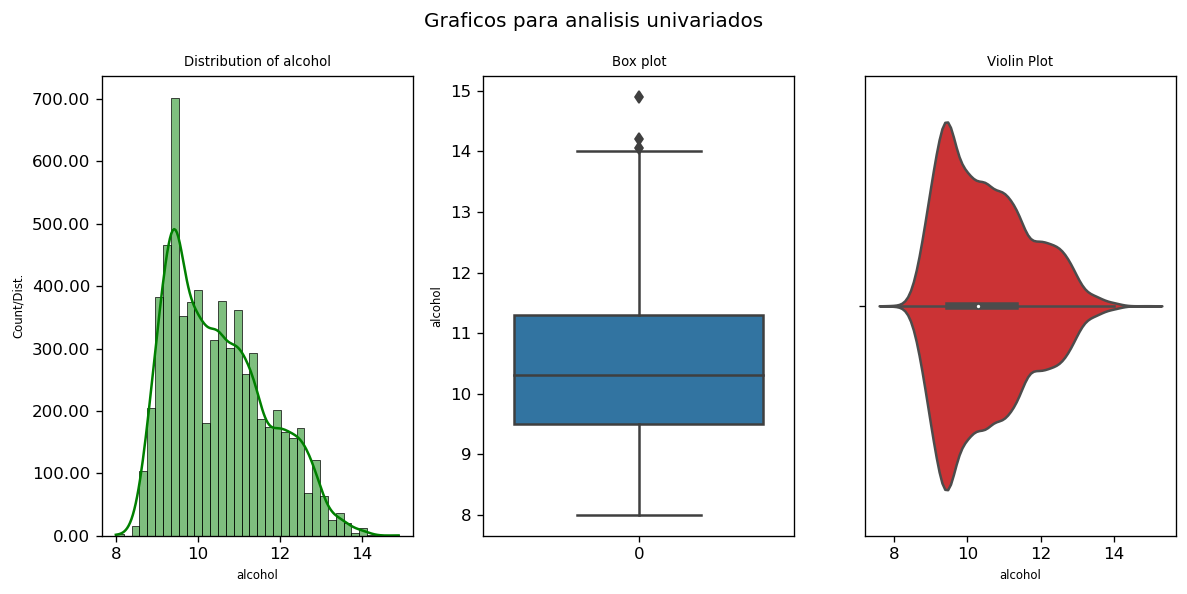

In [13]:
univariate_analysis(dataframe=df_wine_chemical, column_name='alcohol')

A traves de los graficos podemos ver que existen outliers en la columna alcohol.

In [14]:
# Determinamos el valor limite para los outliers superiores
alcohol_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['alcohol']).round(3)
# Filtramos las filas donde alcohol es mayor a la limite superior del boxplot
alcohol_greater_upper_limit = df_wine_chemical[(df_wine_chemical['alcohol'] > alcohol_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un alcohol mayor a 14
print(f"El {round(alcohol_greater_upper_limit['alcohol'].count() * 100 / df_wine_chemical['alcohol'].count(), 2)} % de los vinos tienen un density mayor a {alcohol_upper_limit}")

El 0.05 % de los vinos tienen un density mayor a 14.0


In [15]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(alcohol_greater_upper_limit.index)
print(f"La cantidad de filas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de filas a eliminar hasta el momento es de 3


## Sulphates

### Descripcion de la columna sulphates 

count    6497.000
mean        0.531
std         0.149
min         0.220
25%         0.430
50%         0.510
75%         0.600
max         2.000
Name: sulphates, dtype: float64


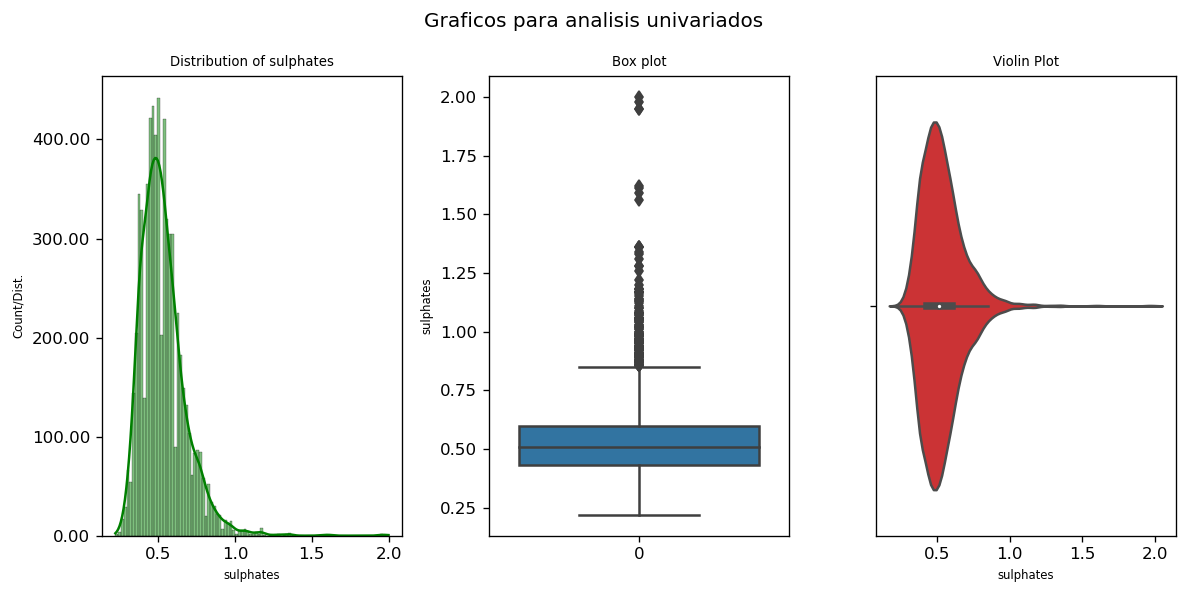

In [16]:
univariate_analysis(dataframe=df_wine_chemical, column_name='sulphates')

A traves de los graficos podemos ver que existen outliers en la columna sulphates.

In [17]:
# Determinamos el valor limite para los outliers superiores
sulphates_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['sulphates']).round(3)

# Filtramos las filas donde sulphates es mayor a la limite superior del boxplot
sulphates_greater_upper_limit = df_wine_chemical[(df_wine_chemical['sulphates'] > sulphates_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un sulfatos mayor a la limite superior del boxplot
print(f"El {round(sulphates_greater_upper_limit['sulphates'].count() * 100 / df_wine_chemical['sulphates'].count(), 2)} % de los vinos tienen sulfatos mayor a {sulphates_upper_limit}")

El 2.94 % de los vinos tienen sulfatos mayor a 0.855


In [18]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(sulphates_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 194


## PH

### Descripcion de la columna pH 

count    6497.000
mean        3.219
std         0.161
min         2.720
25%         3.110
50%         3.210
75%         3.320
max         4.010
Name: pH, dtype: float64


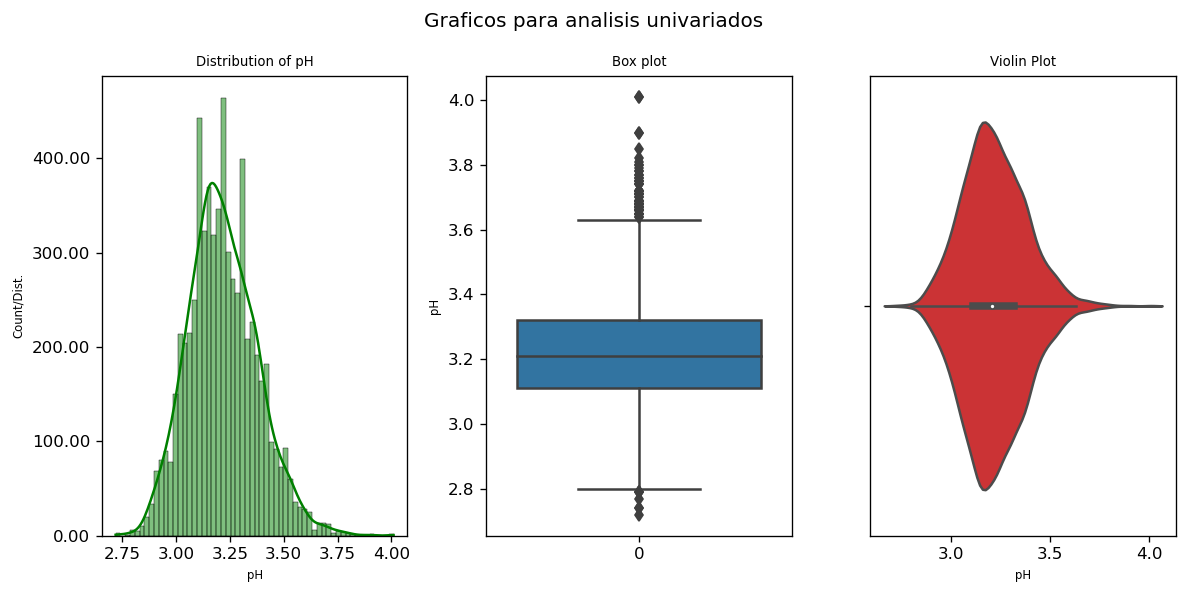

In [19]:
# Analisis univariado de la columna pH
univariate_analysis(dataframe=df_wine_chemical, column_name='pH')

In [20]:
# Determinamos el valor limite para los outliers superiores
pH_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['pH']).round(3)
# Deterimos el valor limite para los outliers inferiores
pH_lower_limit = stats.get_lower_limit_whisker(df_wine_chemical['pH']).round(3)
# Filtramos las filas donde pH es mayor a la limite superior del boxplot
pH_greater_upper_limit = df_wine_chemical[(df_wine_chemical['pH'] > pH_upper_limit)]
# Filtramos las filas donde pH es mayor a la limite inferior del boxplot
pH_less_lower_limit = df_wine_chemical[(df_wine_chemical['pH'] < pH_lower_limit)]
# Representacion en porcentaje de los vinos que tienen un pH mayor a la limite superior del boxplot
print(f"El {round(pH_greater_upper_limit['pH'].count() * 100 / df_wine_chemical['pH'].count(), 2)} % de los vinos tienen un pH mayor a {pH_upper_limit}")
# Representacion en porcentaje de los vinos que tienen un pH mayor a la limite inferior del boxplot
print(f"El {round(pH_less_lower_limit['pH'].count() * 100 / df_wine_chemical['pH'].count(), 2)} % de los vinos tienen un pH menor a {pH_lower_limit}")


El 1.02 % de los vinos tienen un pH mayor a 3.635
El 0.11 % de los vinos tienen un pH menor a 2.795


In [21]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(pH_greater_upper_limit.index)
rows_to_drop.extend(pH_less_lower_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 263


## Density

### Descripcion de la columna density 

count    6497.000
mean        0.995
std         0.003
min         0.987
25%         0.992
50%         0.995
75%         0.997
max         1.039
Name: density, dtype: float64


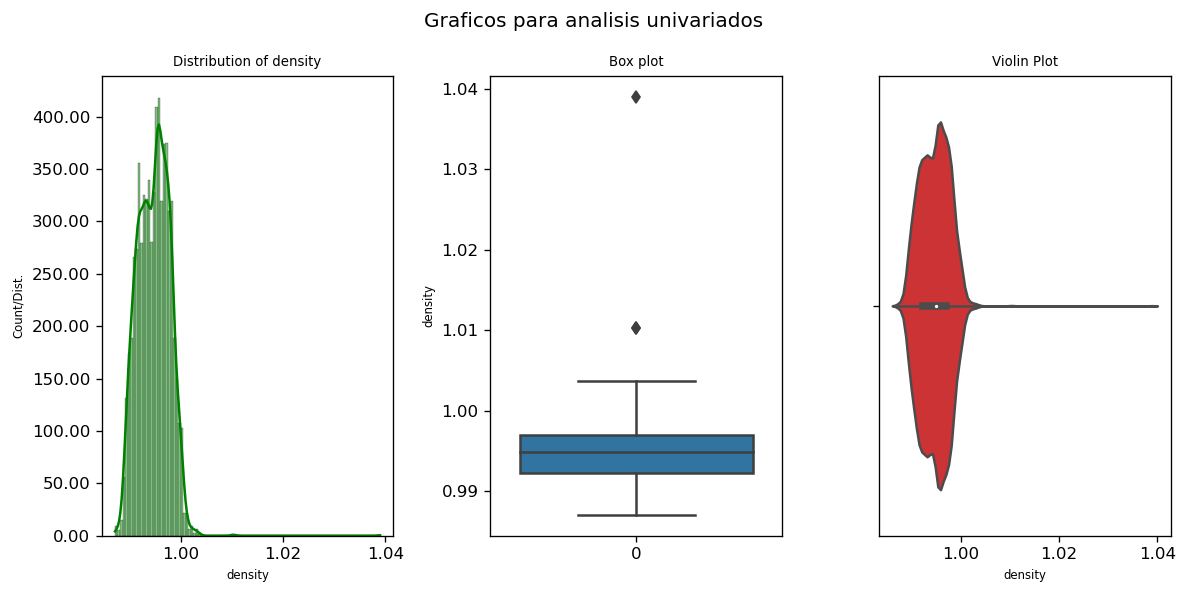

In [22]:
# Analisis univariado de la columna density
univariate_analysis(dataframe=df_wine_chemical, column_name='density')

In [23]:
# Determinamos el valor limite para los outliers superiores
density_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['density']).round(3)
# Filtramos las filas donde density es mayor a la limite superior del boxplot
density_greater_upper_limit = df_wine_chemical[(df_wine_chemical['density'] > density_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un density mayor a la limite superior del boxplot
print(f"El {round(density_greater_upper_limit['density'].count() * 100 / df_wine_chemical['density'].count(), 2)} % de los vinos tienen un density mayor a {density_upper_limit}")

El 0.05 % de los vinos tienen un density mayor a 1.004


In [24]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(density_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 266


## Total sulfur dioxide

### Descripcion de la columna total_sulfur_dioxide 

count    6497.000
mean      115.745
std        56.522
min         6.000
25%        77.000
50%       118.000
75%       156.000
max       440.000
Name: total_sulfur_dioxide, dtype: float64


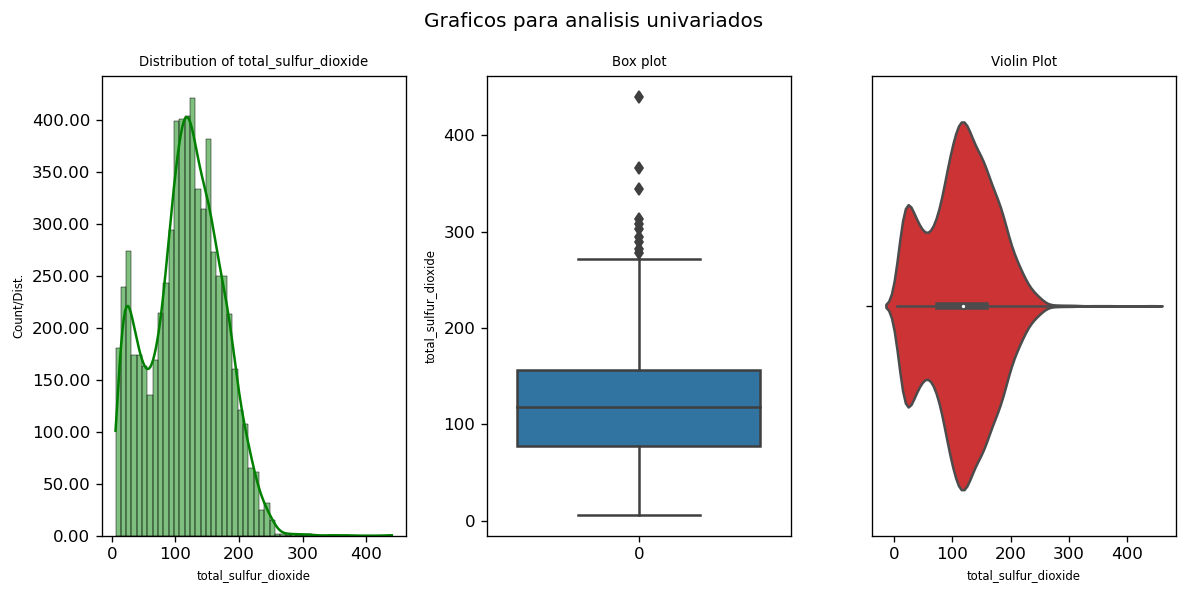

In [25]:
# Analisis univariado de la columna total_sulfur_dioxide
univariate_analysis(dataframe=df_wine_chemical, column_name='total_sulfur_dioxide')

In [26]:
# Determinamos el valor limite para los outliers superiores
sulfur_dioxide_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['total_sulfur_dioxide']).round(3)
# Filtramos las filas donde total_sulfur_dioxide es mayor a la limite superior del boxplot
sulfur_dioxide_greater_upper_limit = df_wine_chemical[(df_wine_chemical['total_sulfur_dioxide'] > sulfur_dioxide_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un total_sulfur_dioxide mayor a la limite superior del boxplot
print(f"El {round(sulfur_dioxide_greater_upper_limit['total_sulfur_dioxide'].count() * 100 / df_wine_chemical['total_sulfur_dioxide'].count(), 2)} % de los vinos tienen un total_sulfur_dioxide mayor a {sulfur_dioxide_upper_limit}")

El 0.15 % de los vinos tienen un total_sulfur_dioxide mayor a 274.5


In [27]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(sulfur_dioxide_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 276


## Free sulfur dioxide

### Descripcion de la columna free_sulfur_dioxide 

count    6497.000
mean       30.525
std        17.749
min         1.000
25%        17.000
50%        29.000
75%        41.000
max       289.000
Name: free_sulfur_dioxide, dtype: float64


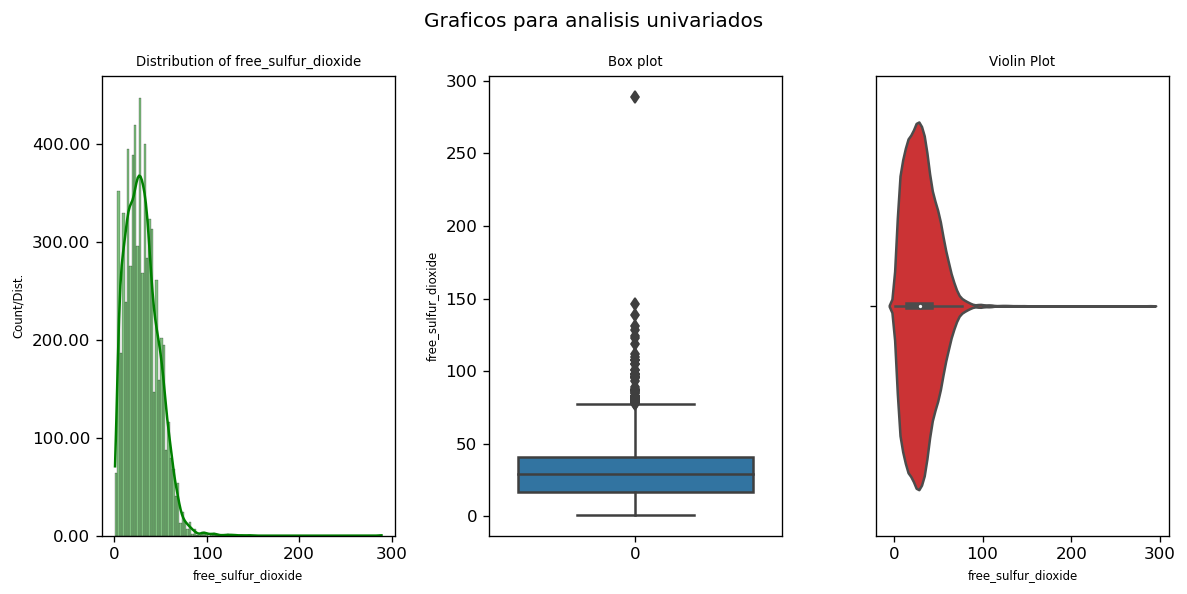

In [28]:
# Analisis univariado de la columna free_sulfur_dioxide
univariate_analysis(dataframe=df_wine_chemical, column_name='free_sulfur_dioxide')

In [29]:
# Determinamos el valor limite para los outliers superiores
free_sulfur_dioxide_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['free_sulfur_dioxide']).round(3)
# Filtramos las filas donde free_sulfur_dioxide es mayor a la limite superior del boxplot
free_sulfur_dioxide_greater_upper_limit = df_wine_chemical[(df_wine_chemical['free_sulfur_dioxide'] > free_sulfur_dioxide_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un free_sulfur_dioxide mayor a la limite superior del boxplot
print(f"El {round(free_sulfur_dioxide_greater_upper_limit['free_sulfur_dioxide'].count() * 100 / df_wine_chemical['free_sulfur_dioxide'].count(), 2)} % de los vinos tienen un free_sulfur_dioxide mayor a {free_sulfur_dioxide_upper_limit}")

El 0.95 % de los vinos tienen un free_sulfur_dioxide mayor a 77.0


In [30]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(free_sulfur_dioxide_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 330


## Chlorides

### Descripcion de la columna chlorides 

count    6497.000
mean        0.056
std         0.035
min         0.009
25%         0.038
50%         0.047
75%         0.065
max         0.611
Name: chlorides, dtype: float64


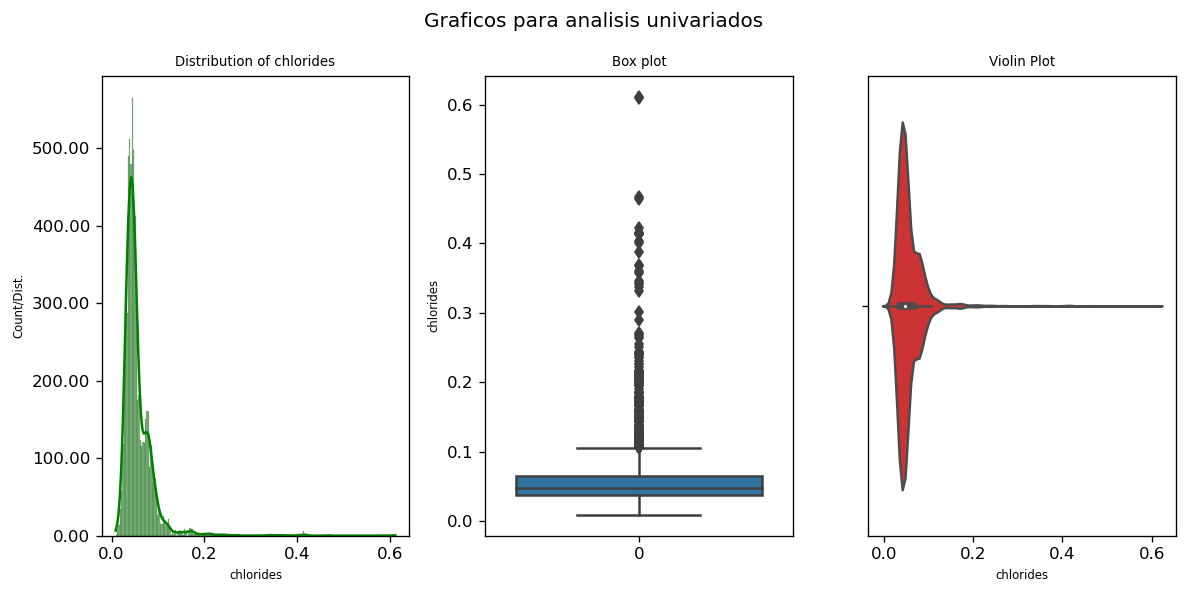

In [31]:
# Analisis univariado de la columna chlorides
univariate_analysis(dataframe=df_wine_chemical, column_name='chlorides')

In [32]:
# Determinamos el valor limite para los outliers superiores
chlorides_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['chlorides']).round(3)
# Filtramos las filas donde chlorides es mayor a la limite superior del boxplot
chlorides_greater_upper_limit = df_wine_chemical[(df_wine_chemical['chlorides'] > chlorides_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un chlorides mayor a la limite superior del boxplot
print(f"El {round(chlorides_greater_upper_limit['chlorides'].count() * 100 / df_wine_chemical['chlorides'].count(), 2)} % de los vinos tienen un chlorides mayor a {chlorides_upper_limit}")

El 4.28 % de los vinos tienen un chlorides mayor a 0.106


In [33]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(chlorides_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 557


## Residual sugar

### Descripcion de la columna residual_sugar 

count    6497.000
mean        5.443
std         4.758
min         0.600
25%         1.800
50%         3.000
75%         8.100
max        65.800
Name: residual_sugar, dtype: float64


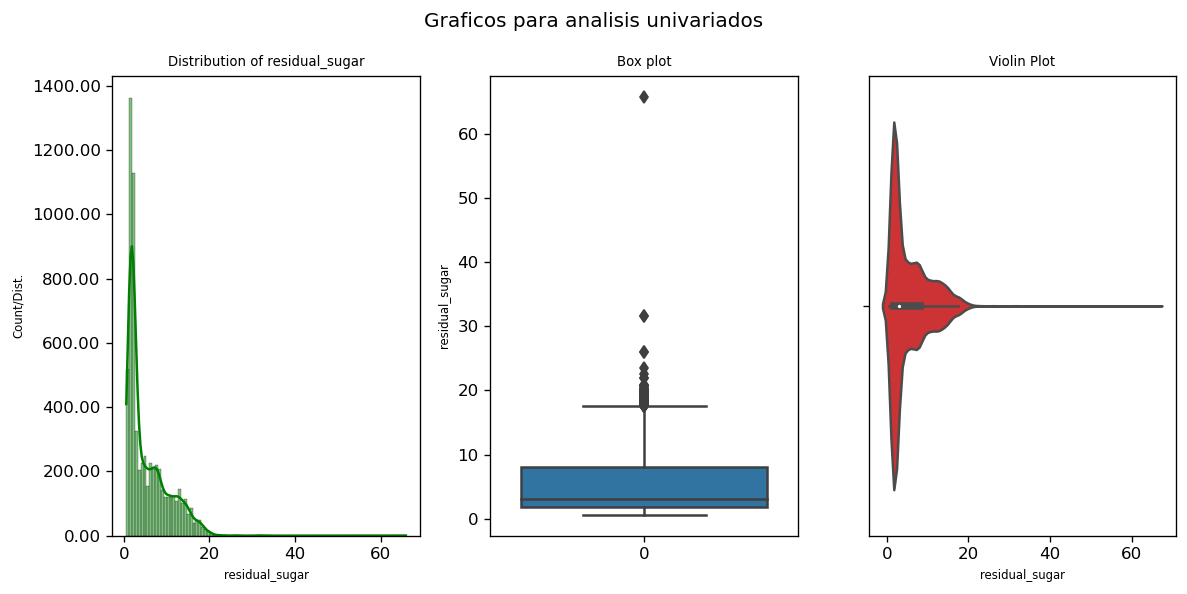

In [34]:
# Analisis univariado de la columna residual_sugar
univariate_analysis(dataframe=df_wine_chemical, column_name='residual_sugar')

In [35]:
# Determinamos el valor limite para los outliers superiores
residual_sugar_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['residual_sugar']).round(3)
# Filtramos las filas donde residual_sugar es mayor a la limite superior del boxplot
residual_sugar_greater_upper_limit = df_wine_chemical[(df_wine_chemical['residual_sugar'] > residual_sugar_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un residual_sugar mayor a la limite superior del boxplot
print(f"El {round(residual_sugar_greater_upper_limit['residual_sugar'].count() * 100 / df_wine_chemical['residual_sugar'].count(), 2)} % de los vinos tienen un residual_sugar mayor a {residual_sugar_upper_limit}")

El 1.77 % de los vinos tienen un residual_sugar mayor a 17.55


In [36]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(residual_sugar_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 667


## Citric acid

### Descripcion de la columna citric_acid 

count    6497.000
mean        0.319
std         0.145
min         0.000
25%         0.250
50%         0.310
75%         0.390
max         1.660
Name: citric_acid, dtype: float64


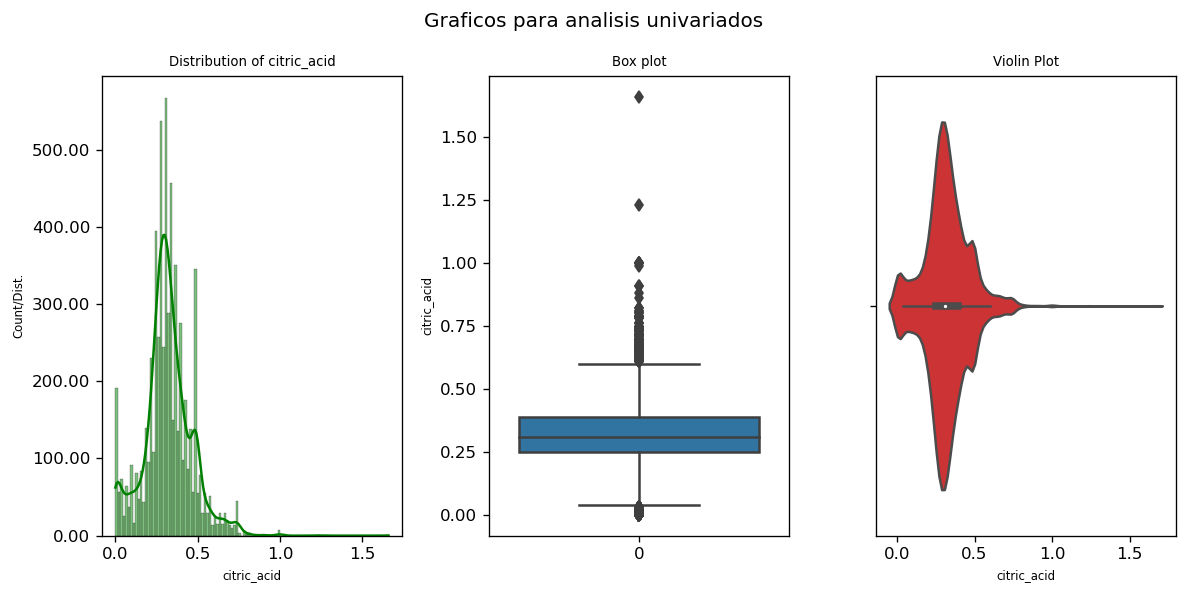

In [37]:
# Analisis univariado de la columna citric_acid
univariate_analysis(dataframe=df_wine_chemical, column_name='citric_acid')

In [38]:
# Determinamos el valor limite para los outliers superiores
citric_acid_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['citric_acid']).round(3)
# Deterimos el valor limite para los outliers inferiores
citric_acid_lower_limit = stats.get_lower_limit_whisker(df_wine_chemical['citric_acid']).round(3)
# Filtramos las filas donde citric_acid es mayor a la limite superior del boxplot
citric_acid_greater_upper_limit = df_wine_chemical[(df_wine_chemical['citric_acid'] > citric_acid_upper_limit)]
# Filtramos las filas donde citric_acid es menor a la limite inferior del boxplot
citric_acid_less_lower_limit = df_wine_chemical[(df_wine_chemical['citric_acid'] < citric_acid_lower_limit)]
# Representacion en porcentaje de los vinos que tienen un citric_acid mayor a la limite superior del boxplot
print(f"El {round(citric_acid_greater_upper_limit['citric_acid'].count() * 100 / df_wine_chemical['citric_acid'].count(), 2)} % de los vinos tienen un citric_acid mayor a {citric_acid_upper_limit}")
# Representacion en porcentaje de los vinos que tienen un citric_acid menor a la limite inferior del boxplot
print(f"El {round(citric_acid_less_lower_limit['citric_acid'].count() * 100 / df_wine_chemical['citric_acid'].count(), 2)} % de los vinos tienen un citric_acid menor a {citric_acid_lower_limit}")


El 3.54 % de los vinos tienen un citric_acid mayor a 0.6
El 4.29 % de los vinos tienen un citric_acid menor a 0.04


In [39]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(citric_acid_greater_upper_limit.index)
rows_to_drop.extend(citric_acid_less_lower_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 1068


## Volatile acidity

### Descripcion de la columna volatile_acidity 

count    6497.000
mean        0.340
std         0.165
min         0.080
25%         0.230
50%         0.290
75%         0.400
max         1.580
Name: volatile_acidity, dtype: float64


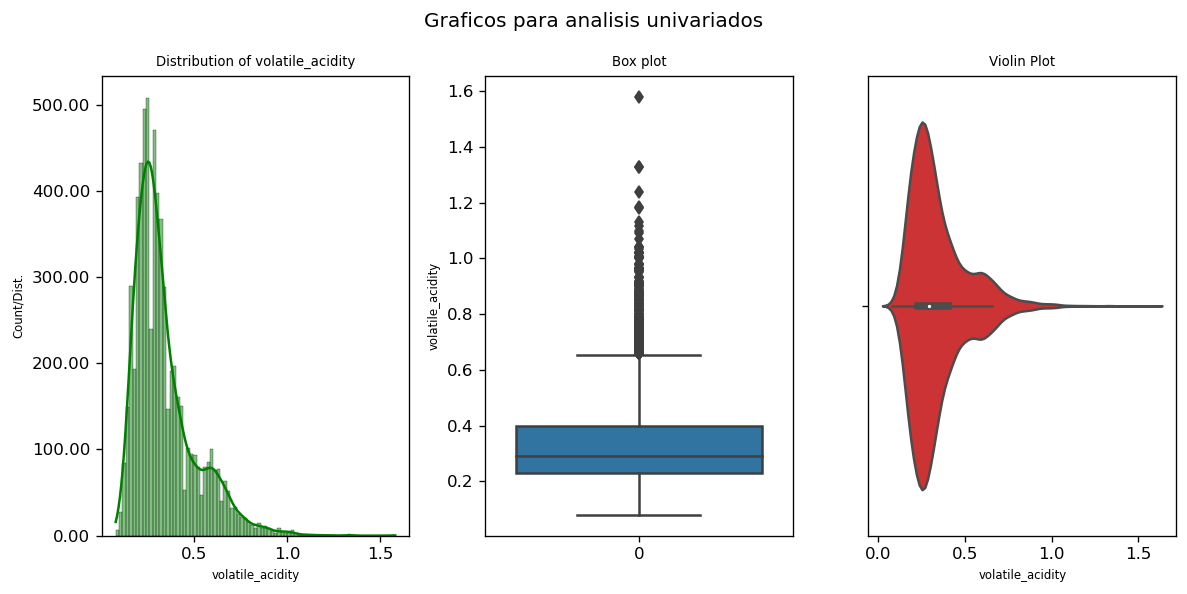

In [40]:
# Analisis univariado de la columna volatile_acidity
univariate_analysis(dataframe=df_wine_chemical, column_name='volatile_acidity')

In [41]:
# Determinamos el valor limite para los outliers superiores
volatile_acidity_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['volatile_acidity']).round(3)
# Filtramos las filas donde volatile_acidity es mayor a la limite superior del boxplot
volatile_acidity_greater_upper_limit = df_wine_chemical[(df_wine_chemical['volatile_acidity'] > volatile_acidity_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un volatile_acidity mayor a la limite superior del boxplot
print(f"El {round(volatile_acidity_greater_upper_limit['volatile_acidity'].count() * 100 / df_wine_chemical['volatile_acidity'].count(), 2)} % de los vinos tienen un volatile_acidity mayor a {volatile_acidity_upper_limit}")

El 5.8 % de los vinos tienen un volatile_acidity mayor a 0.655


In [42]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(volatile_acidity_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))}")

La cantidad de columnas a eliminar hasta el momento es de 1271


## Fixed acidity

### Descripcion de la columna fixed_acidity 

count    6497.000
mean        7.215
std         1.296
min         3.800
25%         6.400
50%         7.000
75%         7.700
max        15.900
Name: fixed_acidity, dtype: float64


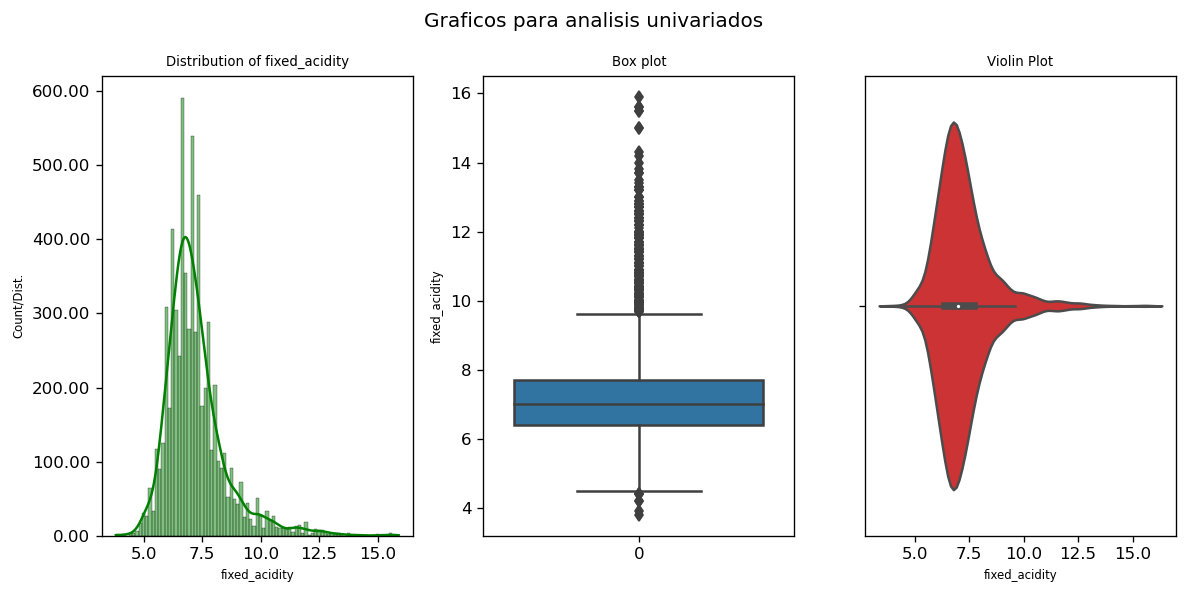

In [43]:
# Analisis univariado de la columna fixed_acidity
univariate_analysis(dataframe=df_wine_chemical, column_name='fixed_acidity')

In [44]:
# Determinamos el valor limite para los outliers superiores
fixed_acidity_upper_limit = stats.get_upper_limit_whisker(df_wine_chemical['fixed_acidity']).round(3)
# Deterimos el valor limite para los outliers inferiores
fixed_acidity_lower_limit = stats.get_lower_limit_whisker(df_wine_chemical['fixed_acidity']).round(3)
# Filtramos las filas donde fixed_acidity es mayor a la limite superior del boxplot
fixed_acidity_greater_upper_limit = df_wine_chemical[(df_wine_chemical['fixed_acidity'] > fixed_acidity_upper_limit)]
# Filtramos las filas donde fixed_acidity es menor a la limite inferior del boxplot
fixed_acidity_less_lower_limit = df_wine_chemical[(df_wine_chemical['fixed_acidity'] < fixed_acidity_lower_limit)]
# Representacion en porcentaje de los vinos que tienen un fixed_acidity mayor a la limite superior del boxplot
print(f"El {round(fixed_acidity_greater_upper_limit['fixed_acidity'].count() * 100 / df_wine_chemical['fixed_acidity'].count(), 2)} % de los vinos tienen un fixed_acidity mayor a {fixed_acidity_upper_limit}")
# Representacion en porcentaje de los vinos que tienen un fixed_acidity menor a la limite inferior del boxplot
print(f"El {round(fixed_acidity_less_lower_limit['fixed_acidity'].count() * 100 / df_wine_chemical['fixed_acidity'].count(), 2)} % de los vinos tienen un fixed_acidity menor a {fixed_acidity_lower_limit}")

El 5.39 % de los vinos tienen un fixed_acidity mayor a 9.65
El 0.11 % de los vinos tienen un fixed_acidity menor a 4.45


In [45]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
rows_to_drop.extend(fixed_acidity_greater_upper_limit.index)
rows_to_drop.extend(fixed_acidity_less_lower_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(rows_to_drop))} que representa un {round(len(set(rows_to_drop)) * 100 / df_wine_chemical.shape[0], 2)} % de las filas")

La cantidad de columnas a eliminar hasta el momento es de 1468 que representa un 22.6 % de las filas


## Limpieza

Eliminar el 22,6 % de los registros es una cantidad significativa de datos que no podemos permitirnos eliminar a simple vista. Por lo que eliminaremos solo aquellos registros que tengan mas de una columna con un valor de outliers.

In [46]:
# Obtenemos los indices de las filas que tienen mas de un outlier
idx_to_drop = [idx for idx in rows_to_drop if rows_to_drop.count(idx) > 1]
print(f"La cantidad de filas a eliminar porque tienen mas de un outlier es de {len(set(idx_to_drop))} que representa un {round(len(set(idx_to_drop)) * 100 / df_wine_chemical.shape[0], 2)} % de las filas")

La cantidad de filas a eliminar porque tienen mas de un outlier es de 430 que representa un 6.62 % de las filas


Reducimos la cantidad de filas a eliminar de 22,6% a 6.62%

In [47]:
#Eliminamos las filas que tienen mas de un outlier
df_wine_chemical.drop(idx_to_drop, inplace=True)

## Tratamiento de outlier

Para los outlier que quedaron tomremos la estrategia de limitar el valor de los outliers al valor limites de la columna.

In [48]:
# alcohol
df_wine_chemical['alcohol'] = df_wine_chemical['alcohol'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['alcohol']), upper=stats.get_upper_limit_whisker(df_wine_chemical['alcohol']))
# sulphates
df_wine_chemical['sulphates'] = df_wine_chemical['sulphates'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['sulphates']), upper=stats.get_upper_limit_whisker(df_wine_chemical['sulphates']))
# ph
df_wine_chemical['pH'] = df_wine_chemical['pH'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['pH']), upper=stats.get_upper_limit_whisker(df_wine_chemical['pH']))
#density
df_wine_chemical['density'] = df_wine_chemical['density'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['density']), upper=stats.get_upper_limit_whisker(df_wine_chemical['density']))
# total sulfur dioxide
df_wine_chemical['total_sulfur_dioxide'] = df_wine_chemical['total_sulfur_dioxide'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['total_sulfur_dioxide']), upper=stats.get_upper_limit_whisker(df_wine_chemical['total_sulfur_dioxide']))
# free sulfur dioxide
df_wine_chemical['free_sulfur_dioxide'] = df_wine_chemical['free_sulfur_dioxide'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['free_sulfur_dioxide']), upper=stats.get_upper_limit_whisker(df_wine_chemical['free_sulfur_dioxide']))
# chlorides
df_wine_chemical['chlorides'] = df_wine_chemical['chlorides'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['chlorides']), upper=stats.get_upper_limit_whisker(df_wine_chemical['chlorides']))
# residual sugar
df_wine_chemical['residual_sugar'] = df_wine_chemical['residual_sugar'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['residual_sugar']), upper=stats.get_upper_limit_whisker(df_wine_chemical['residual_sugar']))
# citric acid
df_wine_chemical['citric_acid'] = df_wine_chemical['citric_acid'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['citric_acid']), upper=stats.get_upper_limit_whisker(df_wine_chemical['citric_acid']))
#volatile acidity
df_wine_chemical['volatile_acidity'] = df_wine_chemical['volatile_acidity'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['volatile_acidity']), upper=stats.get_upper_limit_whisker(df_wine_chemical['volatile_acidity']))
# fixed_acidity
df_wine_chemical['fixed_acidity'] = df_wine_chemical['fixed_acidity'].clip(lower=stats.get_lower_limit_whisker(df_wine_chemical['fixed_acidity']), upper=stats.get_upper_limit_whisker(df_wine_chemical['fixed_acidity']))

In [49]:
df_wine_chemical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6067 entries, 2 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         6067 non-null   float64 
 1   volatile_acidity      6067 non-null   float64 
 2   citric_acid           6067 non-null   float64 
 3   residual_sugar        6067 non-null   float64 
 4   chlorides             6067 non-null   float64 
 5   free_sulfur_dioxide   6067 non-null   float64 
 6   total_sulfur_dioxide  6067 non-null   float64 
 7   density               6067 non-null   float64 
 8   pH                    6067 non-null   float64 
 9   sulphates             6067 non-null   float64 
 10  alcohol               6067 non-null   float64 
 11  quality               6067 non-null   category
 12  style                 6067 non-null   category
dtypes: category(2), float64(11)
memory usage: 581.1 KB


In [50]:
# Por ultimo guardamos el dataframe limpio en un archivo csv
WINE_CLEAN_CSV_PATH = data_dir("intermediate", "df_wine_chemical_clean.csv")
df_wine_chemical.to_csv(WINE_CLEAN_CSV_PATH, index=False,)


# Dataset Comercial


In [51]:
# Declaramos una lista vacia para almacenar los indices de los outliers a eliminar
index_comercial_outliers = []

In [52]:
# Convertimos el tipo de dato de year a numerica
df_wine_comercial["year"] = df_wine_comercial['year'].astype('int')
# convertimos el tipo de dato de body a categoria
df_wine_comercial["body"] = df_wine_comercial["body"].apply(lambda x: f'{x:.0f}').astype("category")
df_wine_comercial["rating"] = df_wine_comercial["rating"].astype("category").cat.codes.astype("category").cat.as_ordered()

In [53]:
df_wine_comercial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070 entries, 0 to 6069
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   winery       6070 non-null   object  
 1   wine         6070 non-null   object  
 2   year         6070 non-null   int32   
 3   rating       6070 non-null   category
 4   num_reviews  6070 non-null   int64   
 5   region       6070 non-null   object  
 6   price        6070 non-null   float64 
 7   type         6070 non-null   object  
 8   body         6070 non-null   category
 9   acidity      6070 non-null   float64 
dtypes: category(2), float64(2), int32(1), int64(1), object(4)
memory usage: 368.2+ KB


### Price

### Descripcion de la columna price 

count    6070.000
mean       67.398
std       165.515
min         6.260
25%        19.980
50%        31.630
75%        61.940
max      3119.080
Name: price, dtype: float64


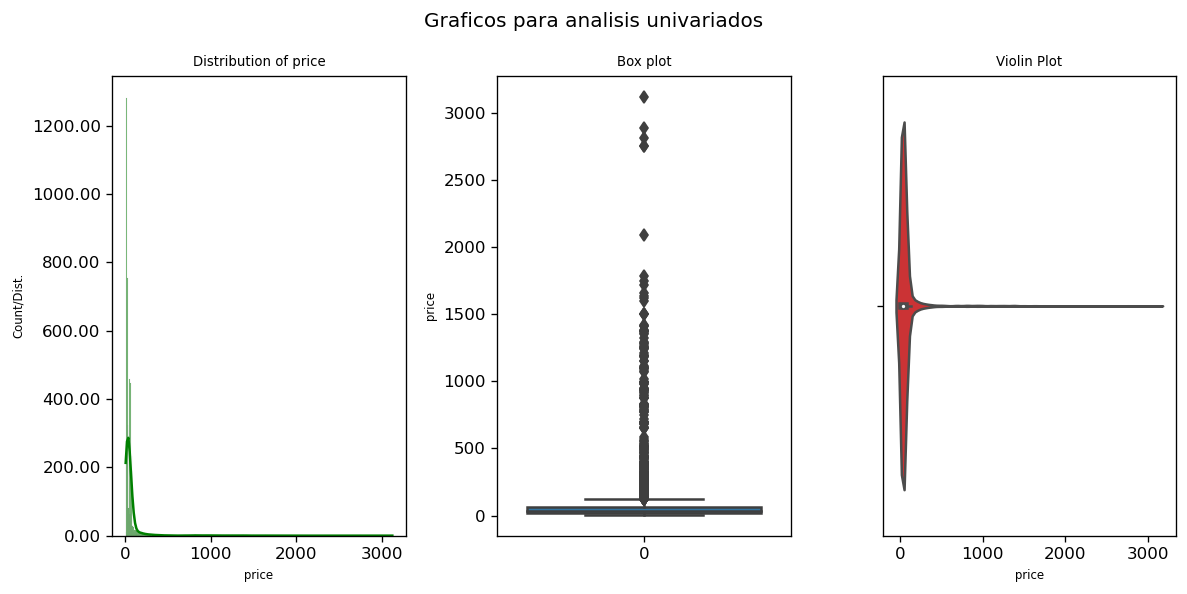

In [54]:
univariate_analysis(dataframe=df_wine_comercial, column_name='price')

In [55]:
# Determinamos el valor limite para los outliers superiores
price_upper_limit = stats.get_upper_limit_whisker(df_wine_comercial['price']).round(3)
# Filtramos las filas donde price es mayor a la limite superior del boxplot
price_greater_upper_limit = df_wine_comercial[(df_wine_comercial['price'] > price_upper_limit)]
# Representacion en porcentaje de los vinos que tienen un price mayor a la limite superior del boxplot
print(f"El {round(price_greater_upper_limit['price'].count() * 100 / df_wine_comercial['price'].count(), 2)} % de los vinos tienen un price mayor a {price_upper_limit}")

El 7.18 % de los vinos tienen un price mayor a 124.88


In [56]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
index_comercial_outliers.extend(price_greater_upper_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(index_comercial_outliers))}")

La cantidad de columnas a eliminar hasta el momento es de 436


### Year

### Descripcion de la columna year 

count    6070.000
mean     2012.955
std         7.145
min      1910.000
25%      2011.000
50%      2015.000
75%      2017.000
max      2021.000
Name: year, dtype: float64


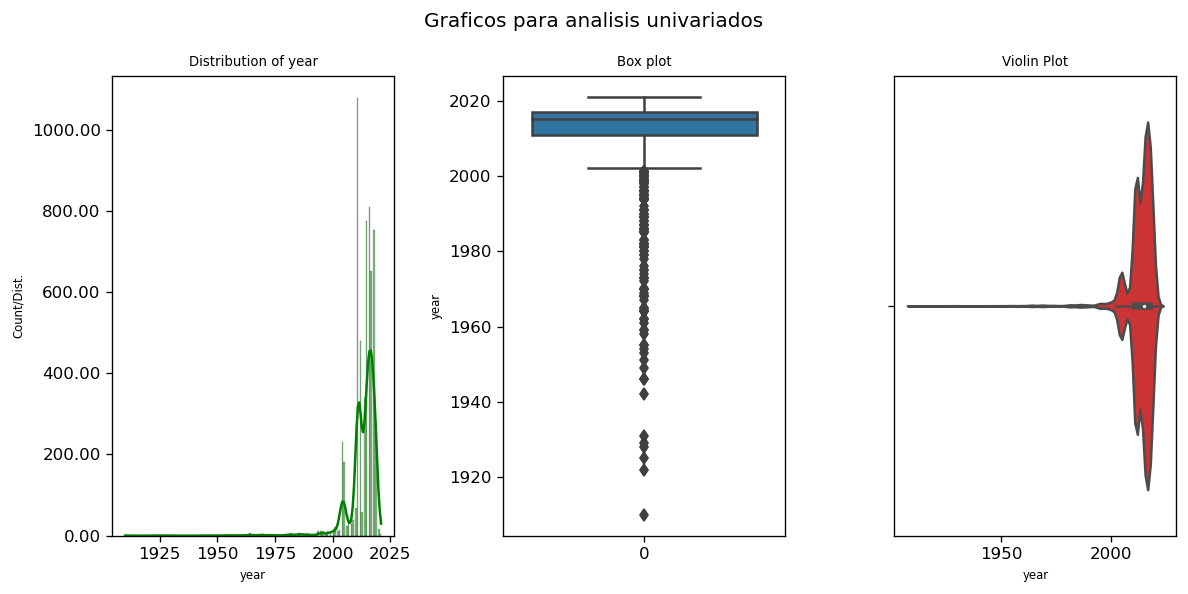

In [57]:
# Analisis univariado de la columna year
univariate_analysis(dataframe=df_wine_comercial, column_name='year')

In [58]:
# Determinamos el valor limite para los outliers superiores
year_upper_limit = stats.get_upper_limit_whisker(df_wine_comercial['year']).round(3)
# Deterimos el valor limite para los outliers inferiores
year_lower_limit = stats.get_lower_limit_whisker(df_wine_comercial['year']).round(3)
# Filtramos las filas donde year es mayor a la limite superior del boxplot
year_greater_upper_limit = df_wine_comercial[(df_wine_comercial['year'] > year_upper_limit)]
# Filtramos las filas donde year es menor a la limite inferior del boxplot
year_less_lower_limit = df_wine_comercial[(df_wine_comercial['year'] < year_lower_limit)]
# Representacion en porcentaje de los vinos que tienen un year mayor a la limite superior del boxplot
print(f"El {round(year_greater_upper_limit['year'].count() * 100 / df_wine_comercial['year'].count(), 2)} % de los vinos tienen un year mayor a {year_upper_limit}")
# Representacion en porcentaje de los vinos que tienen un year menor a la limite inferior del boxplot
print(f"El {round(year_less_lower_limit['year'].count() * 100 / df_wine_comercial['year'].count(), 2)} % de los vinos tienen un year menor a {year_lower_limit}")

El 0.0 % de los vinos tienen un year mayor a 2026.0
El 3.23 % de los vinos tienen un year menor a 2002.0


In [59]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
index_comercial_outliers.extend(year_greater_upper_limit.index)
index_comercial_outliers.extend(year_less_lower_limit.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(index_comercial_outliers))}")

La cantidad de columnas a eliminar hasta el momento es de 482


### num_reviews  

### Descripcion de la columna num_reviews 

count     6070.000
mean       440.065
std        605.072
min         25.000
25%        388.000
50%        402.000
75%        417.000
max      16505.000
Name: num_reviews, dtype: float64


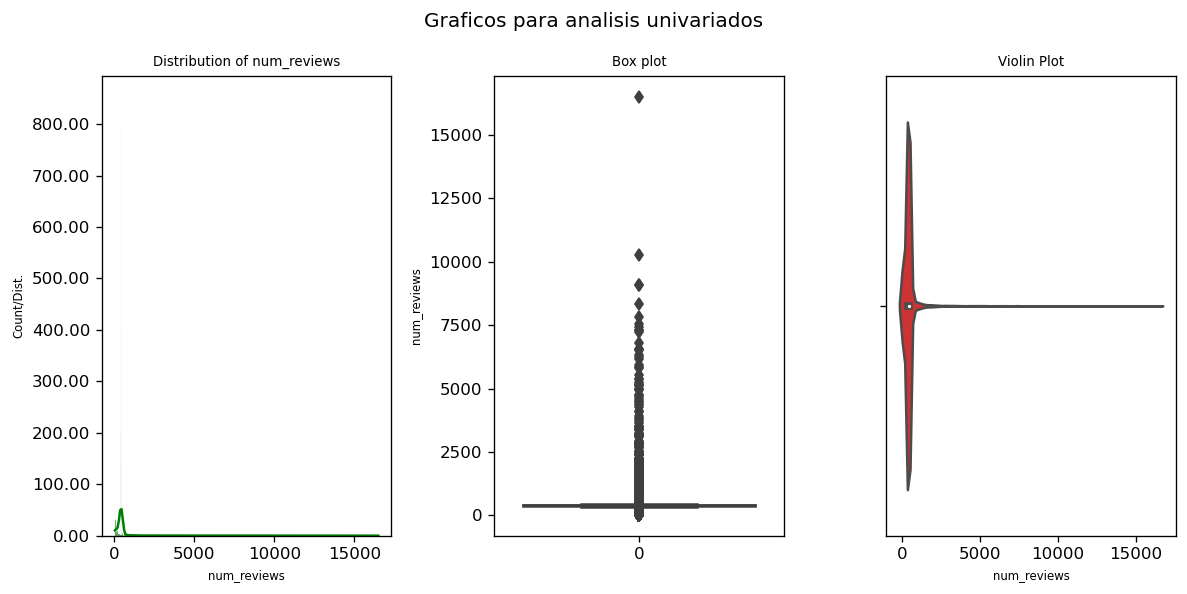

In [60]:
# Analisis univariado de la columna number_of_reviews
univariate_analysis(dataframe=df_wine_comercial, column_name='num_reviews')

In [61]:
# Determinamos el valor limite para los outliers superiores
num_reviews_upper_limit = stats.get_upper_limit_whisker(df_wine_comercial['num_reviews']).round(3)
# Filtramos las filas donde pH es mayor a la limite superior del boxplot
num_reviews_outliers = df_wine_comercial[df_wine_comercial['num_reviews'] > num_reviews_upper_limit]
# Representacion en porcentaje de los vinos que tienen un num_reviews mayor a la limite superior del boxplot
print(f"El {round(num_reviews_outliers['num_reviews'].count() * 100 / df_wine_comercial['num_reviews'].count(), 2)} % de los vinos tienen un numero de reviews mayor a {num_reviews_upper_limit}")

El 7.5 % de los vinos tienen un numero de reviews mayor a 460.5


In [62]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
index_comercial_outliers.extend(num_reviews_outliers.index)
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(index_comercial_outliers))}")

La cantidad de columnas a eliminar hasta el momento es de 859


In [63]:
# Considerando estos outliers los agregamos a la lista de filas que vamos a eliminar
print(f"La cantidad de columnas a eliminar hasta el momento es de {len(set(index_comercial_outliers))} que representa un {round(len(set(index_comercial_outliers)) * 100 / df_wine_chemical.shape[0], 2)} % de las filas")

La cantidad de columnas a eliminar hasta el momento es de 859 que representa un 14.16 % de las filas


## Limpieza

Eliminar el 14,16 % de los registros es una cantidad significativa de datos que no podemos permitirnos eliminar a simple vista. Por lo que eliminaremos solo aquellos registros que tengan mas de una columna con un valor de outliers.

In [64]:
# Obtenemos los indices de las filas que tienen mas de un outlier
idx_to_drop = [idx for idx in index_comercial_outliers if index_comercial_outliers.count(idx) > 1]
print(f"La cantidad de filas a eliminar porque tienen mas de un outlier es de {len(set(idx_to_drop))} que representa un {round(len(set(idx_to_drop)) * 100 / df_wine_chemical.shape[0], 2)} % de las filas")

La cantidad de filas a eliminar porque tienen mas de un outlier es de 211 que representa un 3.48 % de las filas


Tendriamos que eliminar 211 filas, pero teniendo en cuenta que tenemos otro data set al cual tenemos que mergear, y que la mentablemente no tiene relacion con este dataset, la unica manera que tenemos es emparentarlo por la indice.

In [65]:
print(f"En el dataset quimico tenemos {df_wine_chemical.shape[0]} filas y {df_wine_chemical.shape[1]} columnas")
print(f"En el dataset comercial tenemos {df_wine_comercial.shape[0]} filas y {df_wine_comercial.shape[1]} columnas")
print(f"La differncia entre ambos datasets es de {df_wine_comercial.shape[0] - df_wine_chemical.shape[0] } filas")

En el dataset quimico tenemos 6067 filas y 13 columnas
En el dataset comercial tenemos 6070 filas y 10 columnas
La differncia entre ambos datasets es de 3 filas


Con estos datos priorizamos conservar la mayor cantidad de datos posibles y eliminar la cantidad necesaria solo para emparentar la cantidad de registros para poder hacer el merge posterior. 
Con los outliers del dataset comercial los trataremos como hicimos con los del dataset quimico. Asiganaremos los valores limites a los outliers.

In [66]:
# Como la diferencia de filas es de 3 eliminaremos 3 filas del dataset comercial para emparentar ambos datasets
# actualizamos los indices a eliminar buscando los registros que tengan mas de 2 outliers
idx_to_drop = [idx for idx in index_comercial_outliers if index_comercial_outliers.count(idx) > 2]
len(set(idx_to_drop))

17

In [67]:
# obtener los 3 primeros valores de idx_to_drop
idx_to_drop = list(set(idx_to_drop))[:3]
idx_to_drop

[64, 65, 3]

In [68]:
#Eliminamos las filas que tienen mas de un outlier
df_wine_comercial.drop(idx_to_drop, inplace=True)

In [69]:
print(f"En el dataset quimico tenemos {df_wine_chemical.shape[0]} filas y {df_wine_chemical.shape[1]} columnas")
print(f"En el dataset comercial tenemos {df_wine_comercial.shape[0]} filas y {df_wine_comercial.shape[1]} columnas")
print(f"La differncia entre ambos datasets es de {df_wine_comercial.shape[0] - df_wine_chemical.shape[0] } filas")

En el dataset quimico tenemos 6067 filas y 13 columnas
En el dataset comercial tenemos 6067 filas y 10 columnas
La differncia entre ambos datasets es de 0 filas


## Tratamiento de outlier

Para los outlier que quedaron tomremos la estrategia de limitar el valor de los outliers al valor limites de la columna.

In [70]:
# price
df_wine_comercial['price'] = df_wine_comercial['price'].clip(lower=stats.get_lower_limit_whisker(df_wine_comercial['price']), upper=stats.get_upper_limit_whisker(df_wine_comercial['price']))
# year
df_wine_comercial['year'] = df_wine_comercial['year'].clip(lower=stats.get_lower_limit_whisker(df_wine_comercial['year']), upper=stats.get_upper_limit_whisker(df_wine_comercial['year']))
# num_reviews
df_wine_comercial['num_reviews'] = df_wine_comercial['num_reviews'].clip(lower=stats.get_lower_limit_whisker(df_wine_comercial['num_reviews']), upper=stats.get_upper_limit_whisker(df_wine_comercial['num_reviews']))


In [71]:
df_wine_comercial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6067 entries, 0 to 6069
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   winery       6067 non-null   object  
 1   wine         6067 non-null   object  
 2   year         6067 non-null   float64 
 3   rating       6067 non-null   category
 4   num_reviews  6067 non-null   float64 
 5   region       6067 non-null   object  
 6   price        6067 non-null   float64 
 7   type         6067 non-null   object  
 8   body         6067 non-null   category
 9   acidity      6067 non-null   float64 
dtypes: category(2), float64(4), object(4)
memory usage: 439.0+ KB


In [72]:
# convertimos year, num_reviews a int
df_wine_comercial['year'] = df_wine_comercial['year'].astype(int)
df_wine_comercial['num_reviews'] = df_wine_comercial['num_reviews'].astype(int)

In [73]:
# Por ultimo guardamos el dataframe limpio en un archivo csv
WINE_CLEAN_CSV_PATH = data_dir("intermediate", "df_wine_comercial_clean.csv")
df_wine_comercial.to_csv(WINE_CLEAN_CSV_PATH, index=False)


# Merge

Realiamos el merge de los datasets.

In [74]:
# resetamos los index de los dataframes
df_wine_chemical.reset_index(drop=True, inplace=True)
df_wine_comercial.reset_index(drop=True, inplace=True)

In [75]:
df_wine_chemical.shape

(6067, 13)

In [76]:
df_wine_comercial.shape

(6067, 10)

In [77]:
# Mergeamos los dos datasets by index

df_wine_merged = pd.merge(df_wine_chemical, df_wine_comercial, left_index=True, right_index=True)

print(f"{df_wine_merged.shape=}")

df_wine_merged.shape=(6067, 23)


In [78]:
df_wine_merged.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
3229,6.3,0.21,0.28,1.50,0.051,46.0,142.0,0.99280,3.23,0.42,10.1,6,white,La Vicalanda,Reserva,2015,0,420,Rioja,17.50,Rioja Red,4,3.0
2183,6.6,0.23,0.32,0.90,0.041,25.0,79.0,0.99260,3.39,0.54,10.2,7,white,Campillo,Gran Reserva Rioja,2012,0,410,Rioja,22.99,Rioja Red,4,3.0
5771,6.5,0.36,0.31,13.55,0.053,20.0,113.0,0.99544,3.20,0.56,11.0,6,white,Portal del Priorat,Clos del Portal Somni,2014,0,404,Priorato,77.36,Priorat Red,4,3.0
2902,9.0,0.43,0.30,1.50,0.050,7.0,175.0,0.99510,3.11,0.45,9.7,4,white,Sierra Cantabria,Coleccion Privada,2012,0,420,Rioja,28.30,Rioja Red,4,3.0
4841,6.8,0.52,0.26,5.70,0.038,27.0,130.0,0.99000,3.11,0.27,13.0,7,white,Mar de Frades,Rias Baixas Albarino Finca Valinas,2015,0,414,Rias Baixas,16.78,Albarino,3,3.0


In [79]:
# Por ultimo guardamos el dataframe mergeado en un archivo csv
WINE_MERGE_CSV_PATH = data_dir("processed", "df_wine_merged.csv")
df_wine_merged.to_csv(WINE_MERGE_CSV_PATH, index=False)
